Train size: 560
Test size : 240

Uniform voting
--------------
Accuracy : 0.8708
Macro F1 : 0.8703
Confusion matrix:
[[105  15]
 [ 16 104]]

Distance-weighted voting
------------------------
Accuracy : 0.8458
Macro F1 : 0.8412
Confusion matrix:
[[105  15]
 [ 22  98]]


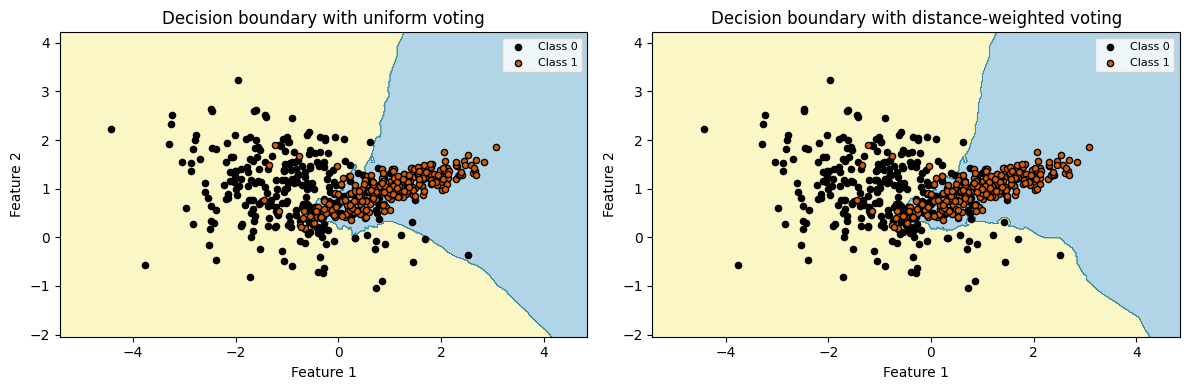

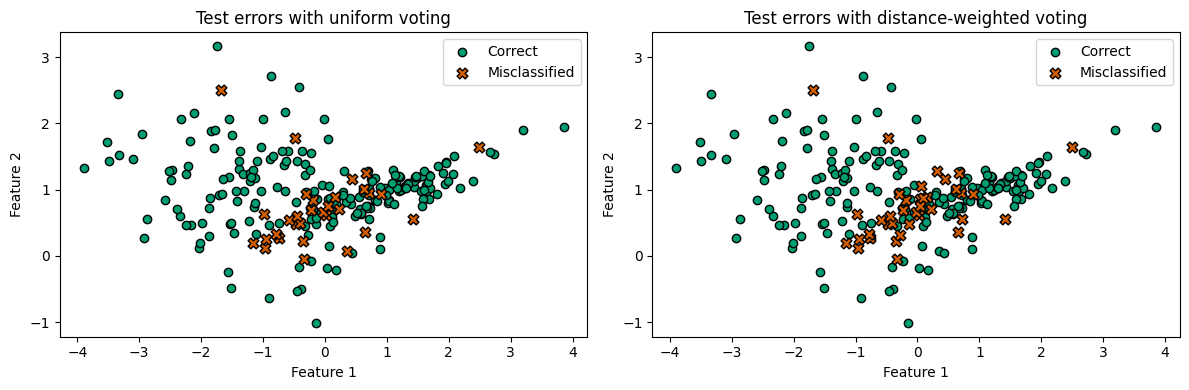

In [1]:
# k-Nearest Neighbours — Effect of Distance Weighting on Decision Boundaries
# Internal focus: Uniform vs Distance-weighted voting
# Single-cell, boundary-focused, rubric-aligned

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# ------------------------------------------------------
# 1. Synthetic 2D dataset (overlap + mild noise)
# ------------------------------------------------------
RANDOM_STATE = 42

X, y = make_classification(
    n_samples=800,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.0,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

print(f"Train size: {len(X_train)}")
print(f"Test size : {len(X_test)}")

# ------------------------------------------------------
# 2. kNN models (ONLY voting differs)
# ------------------------------------------------------
K = 15

knn_uniform = KNeighborsClassifier(
    n_neighbors=K,
    weights="uniform"
)

knn_distance = KNeighborsClassifier(
    n_neighbors=K,
    weights="distance"
)

knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)

# ------------------------------------------------------
# 3. Test-set evaluation
# ------------------------------------------------------
models = {
    "Uniform voting": knn_uniform,
    "Distance-weighted voting": knn_distance
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy : {acc:.4f}")
    print(f"Macro F1 : {f1:.4f}")
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

# ------------------------------------------------------
# 4. Decision boundary plotting helper
# ------------------------------------------------------
def plot_decision_boundary(ax, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    background_cmap = ListedColormap(["#f0e442", "#0072b2"])
    point_colors = ["#000000", "#d55e00"]

    ax.contourf(xx, yy, Z, cmap=background_cmap, alpha=0.3)
    for cls in np.unique(y):
        ax.scatter(
            X_train[y_train == cls, 0],
            X_train[y_train == cls, 1],
            c=point_colors[cls],
            edgecolor="k",
            s=20,
            label=f"Class {cls}"
        )

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend(fontsize=8)

# ------------------------------------------------------
# 5. Decision boundary comparison
# ------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_decision_boundary(
    axes[0],
    knn_uniform,
    "Decision boundary with uniform voting"
)

plot_decision_boundary(
    axes[1],
    knn_distance,
    "Decision boundary with distance-weighted voting"
)

plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 6. Correct vs misclassified samples (test set)
# ------------------------------------------------------
def plot_errors(ax, model, title):
    y_pred = model.predict(X_test)
    correct = (y_pred == y_test)

    ax.scatter(
        X_test[correct, 0], X_test[correct, 1],
        c="#009e73", edgecolor="k", label="Correct"
    )
    ax.scatter(
        X_test[~correct, 0], X_test[~correct, 1],
        c="#d55e00", marker="X", s=60, edgecolor="k",
        label="Misclassified"
    )
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_errors(
    axes[0],
    knn_uniform,
    "Test errors with uniform voting"
)

plot_errors(
    axes[1],
    knn_distance,
    "Test errors with distance-weighted voting"
)

plt.tight_layout()
plt.show()
